## 01: Data Setup and cleaning

### Data Loading

In [51]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)



/home/sam/Github/365DaysOfData/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/sam/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
df = pd.read_csv('data/IMDB Dataset.csv')

In [54]:
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [55]:
 df.shape

(50000, 2)

In [56]:
df.index.shape[-1], # This will give you the number of rows in the DataFrame

(50000,)

In [57]:
print("positive reviews sample:")
print(df[df['sentiment'] == 'positive'].sample(10)['review'].values)

print("negative reviews sample:")
print(df[df['sentiment'] == 'negative'].sample(10)['review'].values)

positive reviews sample:
["A Frank Capra WONDERS OF LIFE film.<br /><br />Keeping the blood pumping through our veins is the responsibility of hardworking HEMO THE Magnificent.<br /><br />In the mid-1950's, AT&T and Bell Science teamed with famed Hollywood director Frank Capra to produce a series of CBS television science films to educate the public about the Universe around them. A far cry from the dreary black & white fodder so often foisted off on young scholars, the Capra films would both instruct and entertain with lively scripts and eye-catching visuals shown in Technicolor. The four films - OUR MR. SUN (1956), THE STRANGE CASE OF THE COSMIC RAYS (1957), HEMO THE MAGNIFICENT (1957), THE UNCHAINED GODDESS (1958) - quickly became schoolhouse favorites, where they were endlessly shown in 16mm format.<br /><br />The star of the series was Dr. Frank C. Baxter (1896-1982), an affable English professor at the University of Southern California. This avuncular pedagogue proved to be the p

In [58]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

### Time for some cleaning, but this is already cleaned data, we don't have to do much


In [59]:
import re
from bs4 import BeautifulSoup
import nltk
import spacy

In [60]:
# we will use dropdupicates directly to the pipeline, so we don't need to do it here

In [61]:
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

#example usage
sample_text = "<p>This is a <b>sample</b> text with <a href='https://example.com'>HTML</a> tags.</p>"
cleaned_text = remove_html_tags(sample_text)
print("Cleaned text:", cleaned_text)

Cleaned text: This is a sample text with HTML tags.


In [62]:
# for the sake of sentiment, we don't need punctuations mostly, so we can remove them/ we can use nltk as well but manual works fine
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)
#example usage
sample_text = "Hello, world! This is a test."
cleaned_text = remove_punctuation(sample_text)
print("Cleaned text:", cleaned_text)

Cleaned text: Hello world This is a test


In [63]:
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
#example usage
sample_text = "Visit us at https://example.com for more information."
cleaned_text = remove_urls(sample_text)
print("Cleaned text:", cleaned_text)

Cleaned text: Visit us at  for more information.


In [64]:
import nltk # we are using nltk for multiple tasks like stopwords, lemmatization
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/sam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
print("Stopwords in English:")
print(nltk.corpus.stopwords.words('english'))
# eg: "the movie was amazing" "the acting was amazing" the "the" doesn't really add value to the sentiment, so we can remove it

Stopwords in English:
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 

In [66]:


def remove_stopwords(text):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    return ' '.join([word for word in text.split() if word.lower() not in stopwords])
#example usage
sample_text = "This is a sample sentence with some stopwords."
cleaned_text = remove_stopwords(sample_text)
print("Cleaned text:", cleaned_text)

Cleaned text: sample sentence stopwords.


In [67]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
#example usage
sample_text = "This is a sample text with emojis 😊🚀."
cleaned_text = remove_emojis(sample_text)   
print("Cleaned text:", cleaned_text)

Cleaned text: This is a sample text with emojis .


In [68]:
### Before Lematization using spacy we will visualize how spacy works, what's exacty it is and how NLP tasks are done using spacy
import spacy
nlp = spacy.load("en_core_web_sm")

# Process a sample text
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

#Basic operations
print("Tokens:")
for token in doc:
    print(token.text, end=' | ')
print("\n\nPOS Tags:")
for token in doc:
    print(f"{token.text}: {token.pos_}", end=' | ')
print("\n\nNamed Entities:")
for ent in doc.ents:
    print(f"{ent.text}: {ent.label_}", end=' | ')
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])
#example usage
sample_text = "The cats are running and jumping."
cleaned_text = lemmatize_text(sample_text)
print("Cleaned text:", cleaned_text)



## or we can even use textblob for different tasks like lemmatization, sentiment analysis, etc.
# eg sentiment analysis with textblog
from textblob import TextBlob

text = "this movie was absolutely fantastic, i loved every moment of it!"
blob = TextBlob(text)


sentiment = blob.sentiment
print("Polarity:", sentiment.polarity)      # -1 (negative) to 1 (positive)
print("Subjectivity:", sentiment.subjectivity)  # 0 (fact) to 1 (opinion)



Tokens:
Apple | is | looking | at | buying | U.K. | startup | for | $ | 1 | billion | 

POS Tags:
Apple: PROPN | is: AUX | looking: VERB | at: ADP | buying: VERB | U.K.: PROPN | startup: VERB | for: ADP | $: SYM | 1: NUM | billion: NUM | 

Named Entities:
Apple: ORG | U.K.: GPE | $1 billion: MONEY | Cleaned text: the cat be run and jump .
Polarity: 0.6375
Subjectivity: 0.8500000000000001


In [69]:

def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

#example usage
sample_text = "The cats are running and jumping."
cleaned_text = lemmatize_text(sample_text)
print("Lemmatized text:", cleaned_text)

Lemmatized text: the cat be run and jump .


In [70]:
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)  


    return data

# example usage
sample_text = "I can't believe it's already been a year since we met! He's such a great friend, and I wouldn't trade our memories for anything. Don't you think it's amazing how time flies?"
cleaned_text = remove_abb(sample_text)
print("Cleaned text:", cleaned_text)

Cleaned text: I cannot believe it is already been a year since we met! He is such a great friend, and I would not trade our memories for anything. do not you think it is amazing how time flies?


In [71]:
def clean_data(review):
    # remove html tags
    review = remove_html_tags(review)
    # remove punctuations
    review = remove_punctuation(review)
    # remove urls
    review = remove_urls(review)
    # remove stopwords
    review = remove_stopwords(review)
    # remove emojis
    review = remove_emojis(review)
    # remove abbreviations
    review = remove_abb(review)
    # lemmatize words- convert words to their base form like "running" to "run"
    review = lemmatize_text(review)

    return review

# Remove duplicate rows first
df = df.drop_duplicates()

# Apply pipeline to entire dataset and save as `cleaned_imdb.csv`
df['cleaned_review'] = df['review'].apply(clean_data)
df.to_csv('data/cleaned_imdb.csv', index=False)

KeyboardInterrupt: 

In [7]:
df = pd.read_csv('data/cleaned_imdb.csv')

In [36]:
df.sample(2)


,review,sentiment,cleaned_review
3702,"This film is an entertaining, fun and quality film. The film very cleverly follows the guidelines if the book, and tries to stick to the exact lines. The actors are all suitable, and you would expect them to be the part. They use some famous actors which give a great effect on the film. The graphics is a bit dodgy in some parts, and there are quite a few mistakes throughout the film. There is no such thing as a Yellow Spotted Lizard, for example. The camp is not as gruesome as explained in the book, and they tend not to show the goings on in the camp as much as the book. All of his group are mentioned a lot in the book, but are not in the film. Overall, a great film for a rainy afternoon",positive,film entertain fun quality film film cleverly follow guideline book try stick exact line actor suitable would expect part use famous actor give great effect film graphic bit dodgy part quite mistake throughout film thing Yellow Spotted Lizard example camp gruesome explain book tend show going camp much book group mention lot book film Overall great film rainy afternoon
10655,"The danish movie ""Slim Slam Slum"" surprised me to be the worst movie i have seen to this date. I didn't think that it was possible to top my list of bad bad b-movies but this one deserves the gold. It's not funny. It's bad acting, It's bad filmed and the storyline is bad. The only positive thing i can say about this movie is it has three girls in it. I truly believe this flick has the potential to knock of the other danish movie ""Stjerner uden hjerner"" as the badest danish film ever made! And that's truly something. Congratulations in advance!",negative,danish movie Slim Slam Slum surprise bad movie see date do not think possible top list bad bad bmovie one deserve gold funny bad act bad film storyline bad positive thing say movie three girl truly believe flick potential knock danish movie Stjerner uden hjerner bad danish film ever make that s truly something congratulation advance


## Text Analysis

In [40]:
df['word_count'] = df['cleaned_review'].apply(lambda x: len(x.split()))

In [44]:
df['word_count']

0        174
1         84
2         88
3         70
4        125
        ... 
49577     93
49578     57
49579    116
49580    117
49581     70
Name: word_count, Length: 49582, dtype: int64

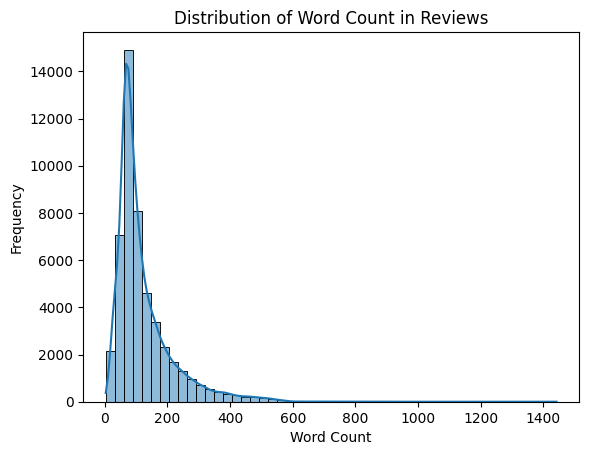

In [47]:
sns.histplot(df['word_count'], bins=50, kde=True)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Count in Reviews')
plt.show()

/tmp/ipykernel_7185/1858490227.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


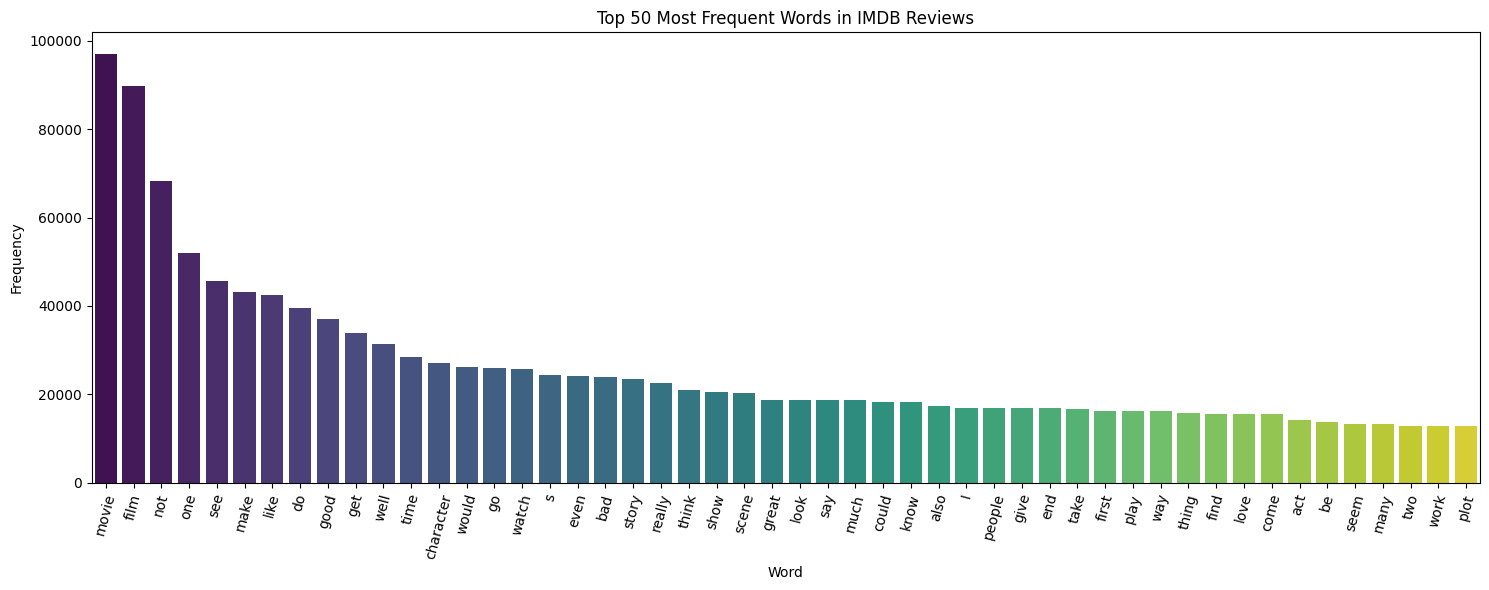

In [50]:
# Unpack words and counts
words, counts = zip(*top_50_words)

plt.figure(figsize=(15, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xticks(rotation=75)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 50 Most Frequent Words in IMDB Reviews')
plt.tight_layout()
plt.show()